# Socially Generated Positive Reinforcement on Social Media

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
import networkx as nx
import colorsys
from scipy.optimize import curve_fit

### Read in cleaned data

In [2]:
data = pd.read_csv('twitterData')

## PCA

In [3]:
pca = PCA(0.9)
X = data[['retweet_count','favorite_count','followers_count','friends_count','favorites_count','statuses_count','hourDiff']]
X = preprocessing.StandardScaler().fit_transform(X)
pca.fit(X)
X = pca.transform(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)
display(X.shape)

[0.32606745 0.23953562 0.14193625 0.12708576 0.08347572]
[166.11769501 142.37941997 109.59956457 103.70760909  84.05088083]


(12090, 5)

This doesn't support the propositition of dimension reduction if we find there to be too much noise. So we will have to deal with is as it comes.

## Favorite and Retweet correlation

In [4]:
lm = linear_model.LinearRegression()
X = data[['retweet_count']]
y = data[['favorite_count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
lm.fit(X_train,y_train)
print("Coefficient: ", lm.coef_ , "\nIntercept:", lm.intercept_)
y_pred = lm.predict(X_test)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient:  [[13.25928336]] 
Intercept: [-0.98106609]
Coefficient of determination: 0.62


So quite simply, we can expect an upward trend of favorites and retweets, modeled by:

$\text{Favorites} \approx 5.5\times \text{Retweets} + 2$

In [5]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         favorite_count   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 2.862e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        13:49:02   Log-Likelihood:                -62188.
No. Observations:               10881   AIC:                         1.244e+05
Df Residuals:                   10879   BIC:                         1.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9811      0.708     -1.386

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

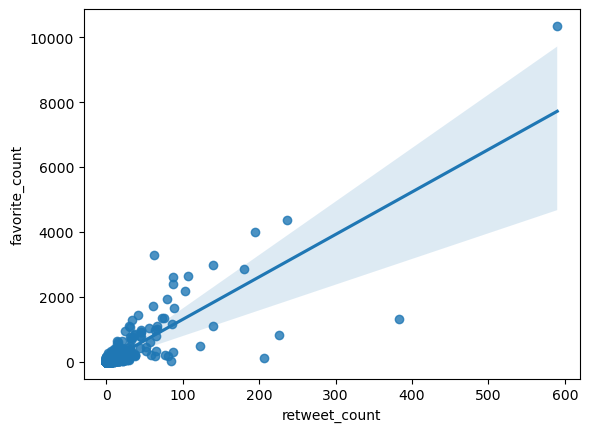

In [6]:
sns.regplot(x=X, y=y)

## What happens when we consider the number of followers the poster has?

In [7]:
X = data[['followers_count','retweet_count']]
y = data[['favorite_count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print("Coefficient: ", lm.coef_ , "\nIntercept:", lm.intercept_)
y_pred = lm.predict(X_test)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient:  [[2.71084449e-04 1.14869926e+01]] 
Intercept: [-2.7653575]
Coefficient of determination: 0.74


$\text{Favorites} \approx 5.36\times \text{Retweets} -0.00002\times \text{Followers} + 2$

In [8]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         favorite_count   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 1.899e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        13:49:03   Log-Likelihood:                -61030.
No. Observations:               10881   AIC:                         1.221e+05
Df Residuals:                   10878   BIC:                         1.221e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.7654      0.637     

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

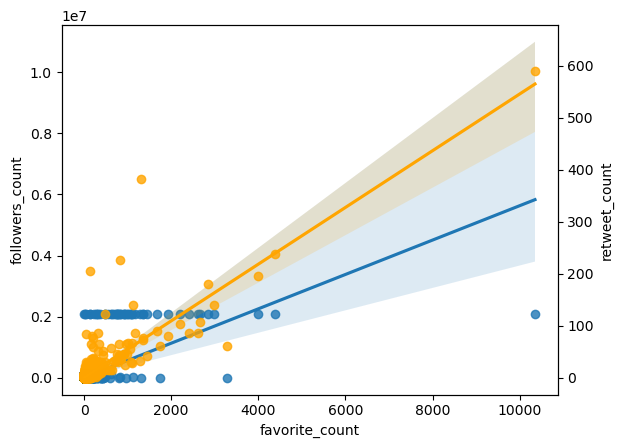

In [9]:
sns.regplot(y=X.followers_count,x=y)
ax2 = plt.twinx()
sns.regplot(y=X.retweet_count,x=y,color='orange')

## Multi-dimensional linear regression prediciting time til next tweet

In [10]:
X = data[['retweet_count','favorite_count','followers_count','friends_count','statuses_count']]
y = data[['minDiff']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print("Coefficient: ", lm.coef_ , "\nIntercept:", lm.intercept_)
y_pred = lm.predict(X_test)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

Coefficient:  [[ 5.09090949e+00 -3.75202404e-01 -8.03568403e-05 -1.80146067e-02
  -1.34169619e-03]] 
Intercept: [751.60651557]
Coefficient of determination: 0.00
                            OLS Regression Results                            
Dep. Variable:                minDiff   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.923
Date:                Tue, 02 May 2023   Prob (F-statistic):            0.00149
Time:                        13:49:04   Log-Likelihood:            -1.0246e+05
No. Observations:               10881   AIC:                         2.049e+05
Df Residuals:                   10875   BIC:                         2.050e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t

$\text{Minutes til Tweet} \approx 47\times \text{Retweets} - 3.2 \times \text{Favorites} + 0.001\times \text{Friends} - 0.015 \times \text{User Favorites} -0.0048 \times \text{User Tweets}+536$

## Exponential Model

For this to work we need to drop tweets with 0 favorites or retweets and 0 time between posts. Furthermore, we'll only consider posts which have an abnormal number of favorites.

In [38]:
exp = data[['retweet_count', 'favorite_count', 'zScoreFav','zScoreRT','minDiff','hourDiff']]

### Retweets above 2 sigma

<AxesSubplot:xlabel='retweet_count', ylabel='minDiff'>

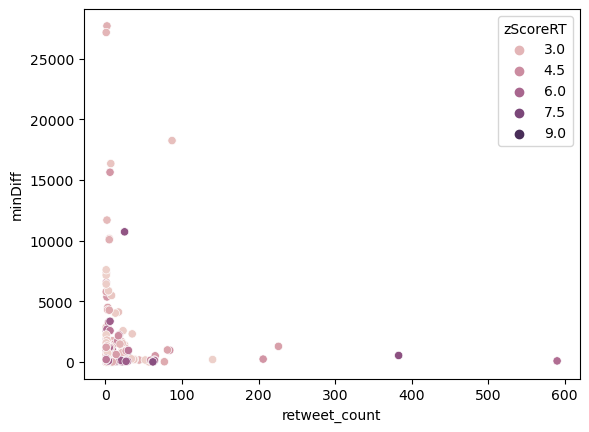

In [41]:
expRT = exp.query('retweet_count > 0 and minDiff > 0 and zScoreRT > 2')
sns.scatterplot(data = expRT, x='retweet_count', y='minDiff',hue='zScoreRT')

<AxesSubplot:xlabel='retweet_count', ylabel='minDiff'>

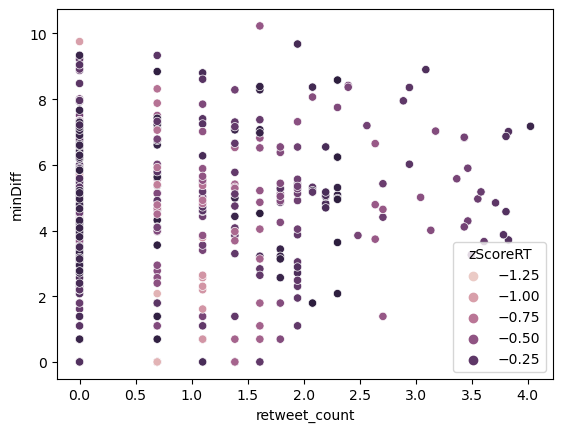

In [37]:
X = np.log(expRT.retweet_count)
y = np.log(expRT.minDiff)
sns.scatterplot(x=X,y=y,hue=expRT.zScoreRT)

### Favorites above 2 sigma

<AxesSubplot:xlabel='favorite_count', ylabel='minDiff'>

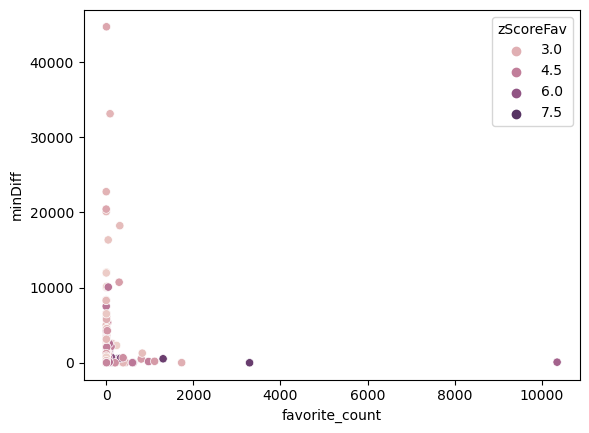

In [43]:
expFav = exp.query('favorite_count > 0 and minDiff > 0 and zScoreFav > 2')
sns.scatterplot(data = expFav, x='favorite_count', y='minDiff',hue='zScoreFav')

<AxesSubplot:xlabel='retweet_count', ylabel='minDiff'>

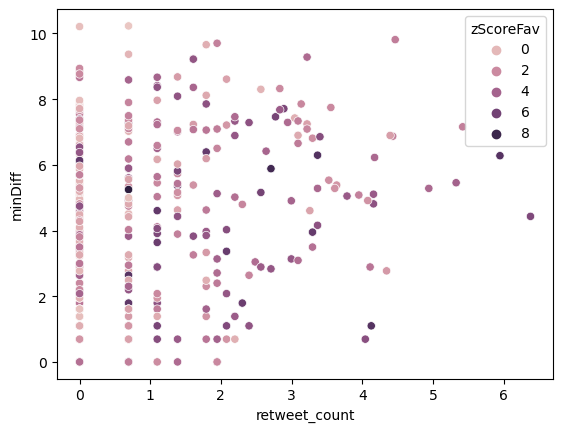

In [45]:
X = np.log(expRT.retweet_count)
y = np.log(expRT.minDiff)
sns.scatterplot(x=X,y=y,hue=expRT.zScoreFav)

## Oppoiste Hypothesis
Here we'll test how the opposite hypoithesis works:
If a tweet underperforms compared to user nomal, then the user will take longer to post again
### Retweets below average

<AxesSubplot:xlabel='retweet_count', ylabel='minDiff'>

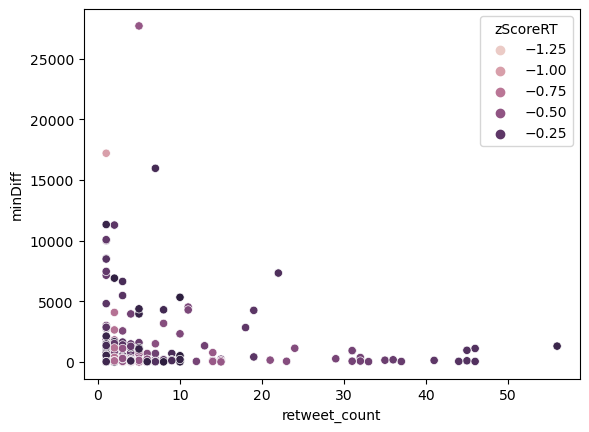

In [46]:
expRT = exp.query('retweet_count > 0 and minDiff > 0 and zScoreRT < 0')
sns.scatterplot(data = expRT, x='retweet_count', y='minDiff',hue='zScoreRT')

<AxesSubplot:xlabel='retweet_count', ylabel='minDiff'>

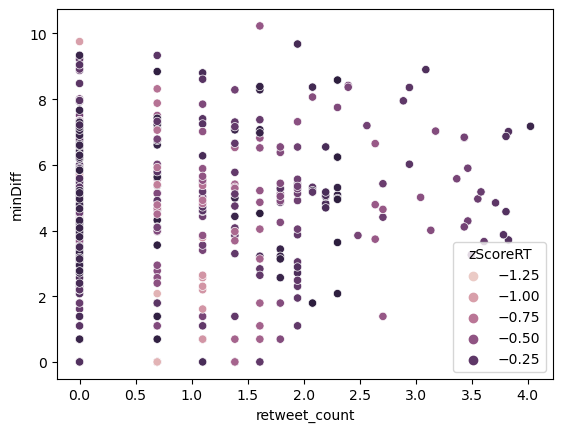

In [47]:
X = np.log(expRT.retweet_count)
y = np.log(expRT.minDiff)
sns.scatterplot(x=X,y=y,hue=expRT.zScoreRT)

### Favorites below average

<AxesSubplot:xlabel='favorite_count', ylabel='minDiff'>

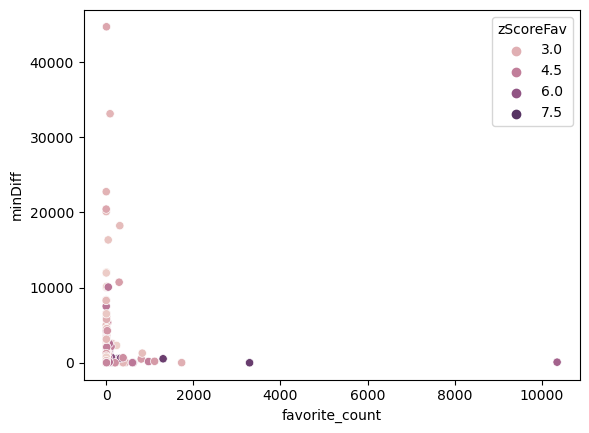

In [50]:
expFav = exp.query('favorite_count > 0 and minDiff > 0 and zScoreFav > 2')
sns.scatterplot(data = expFav, x='favorite_count', y='minDiff',hue='zScoreFav')

<AxesSubplot:xlabel='retweet_count', ylabel='minDiff'>

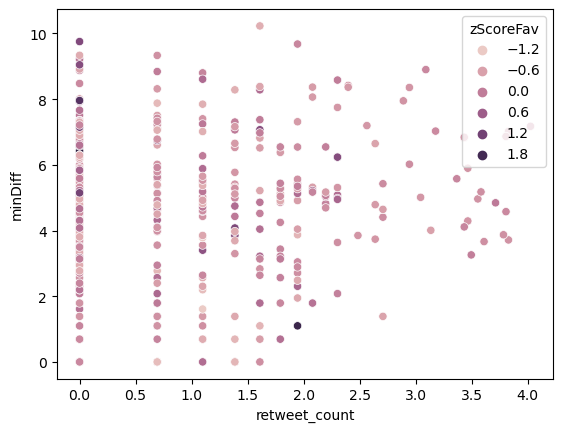

In [49]:
X = np.log(expRT.retweet_count)
y = np.log(expRT.minDiff)
sns.scatterplot(x=X,y=y,hue=expRT.zScoreFav)

## Multi-layer Perceptron regressor

In [18]:
def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)

In [70]:
X = data[['retweet_count','favorite_count']]#,'followers_count','friends_count','statuses_count']]
y = data[['minDiff']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [71]:
mlp1 = MLPRegressor(hidden_layer_sizes=(10,14,5,3),max_iter=1000)
mlp1.fit(X_train,y_train)

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(10, 14, 5, 3), max_iter=1000)

In [58]:
predictions1 = mlp1.predict(X_test)
print(r2_score(y_test,predictions1))
print(mean_squared_error(y_test,predictions1))

0.0162781380837137
6983365.878352658


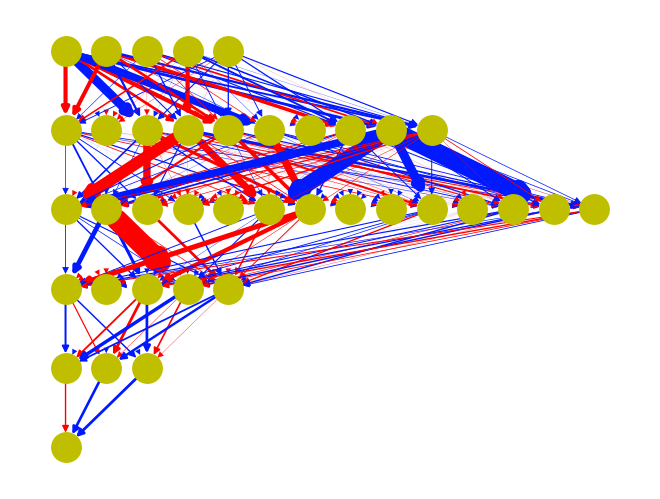

In [69]:
show_ann(mlp1)